In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/home/root1/Desktop/students.csv")
df



,Hours,Scores
0,4,8
1,3,9
2,7,4
3,3,7
4,6,3
5,8,6
6,5,3
7,1,7
8,7,7


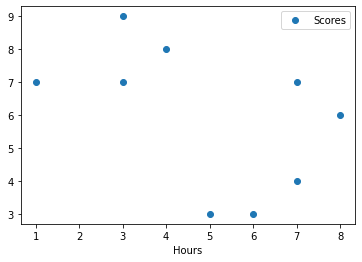

In [2]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()


In [3]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

4.888888888888889 6.0


In [4]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,4,8,-0.888889,2.0,-1.777778,0.790123,4.0
1,3,9,-1.888889,3.0,-5.666667,3.567901,9.0
2,7,4,2.111111,-2.0,-4.222222,4.456790,4.0
3,3,7,-1.888889,1.0,-1.888889,3.567901,1.0
4,6,3,1.111111,-3.0,-3.333333,1.234568,9.0
5,8,6,3.111111,0.0,0.000000,9.679012,0.0
6,5,3,0.111111,-3.0,-0.333333,0.012346,9.0
7,1,7,-3.888889,1.0,-3.888889,15.123457,1.0
8,7,7,2.111111,1.0,2.111111,4.456790,1.0


In [5]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


-19.0 42.88888888888889 38.0


In [6]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

-0.4706406173223632

In [7]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [8]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [9]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

2.182986967154278 2.0548046676563256


In [10]:

m = correlation * (std_deviation_y / std_deviation_x)
m


c = df["Scores"].mean() - m * df["Hours"].mean()
c


8.16580310880829

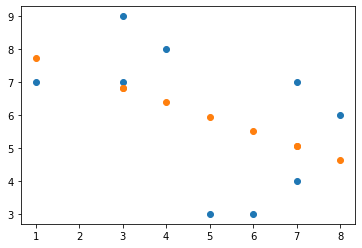

In [11]:

df["y_prediction"] = m * df["Hours"] + c
df


plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()